In [2]:
import numpy as np
import scipy.signal as signal
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
R = 20000
C = 20e-12

def diode (x):
    v_t = 25.9 / 1000
    I_s = 0.2
    return I_s * (np.exp (x / v_t) - 1)

def diode_dot (x):
    v_t = 25.9 / 1000
    I_s = 0.2
    return I_s / v_t * (np.exp (x / v_t))

In [4]:
def deriv (x, x_1, x_1_dot, T):
    return (x - x_1) * (2/T) - x_1_dot

def integral (x_1, x_dot, x_1_dot, T):
    return x_1 + (T/2) * (x_dot + x_1_dot)

<IPython.core.display.Javascript object>


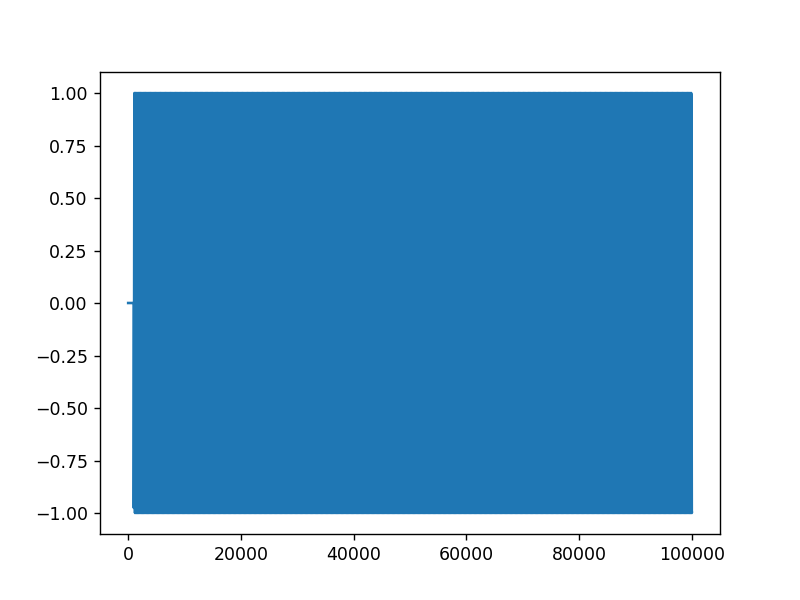

In [6]:
fs = 44100
N = 100000
freq = 200
n = np.arange (N)
x = np.zeros (N)
x[1000:N] = np.cos (2 * np.pi * n[1000:N] * freq / fs) # / 10000
plt.figure()
plt.plot (x)

In [8]:
v_c = 0
v_b = 0
v_c_dot = 0
v_b_dot = 0

y = np.zeros (N)

for n in range (N):
    v_i = x[n]
    
    v_c_1 = v_c
    v_b_1 = v_b
    v_c_dot_1 = v_c_dot
    v_b_dot_1 = v_b_dot
    
    for k in range (10):
        I_D1 = diode (-v_b)
        r_D1 = 1.0 / diode_dot (-v_b)
        I_D2 = diode (v_b - v_c)
        r_D2 = 1.0 / diode_dot (v_b - v_c)
        
        v_c_last = v_c
        num = (r_D1 * I_D1 / r_D2) - (r_D1 * v_i / R / r_D2) + I_D2 + C * (v_b_dot - v_c_dot)
        den = (1.0 / R) - (r_D1 / R / r_D2) + (1.0 / r_D2)
        v_c = num / den
        v_b = r_D1 * (I_D1 - (1.0/R) * (v_i - v_c))
        v_c_dot = deriv (v_c, v_c_1, v_c_dot_1, 1.0 / fs)
        v_b_dot = deriv (v_b, v_b_1, v_b_dot_1, 1.0 / fs)
        
        if (abs (v_c - v_c_last) < 1e-6):
            break
    
    y[n] = v_c

<IPython.core.display.Javascript object>


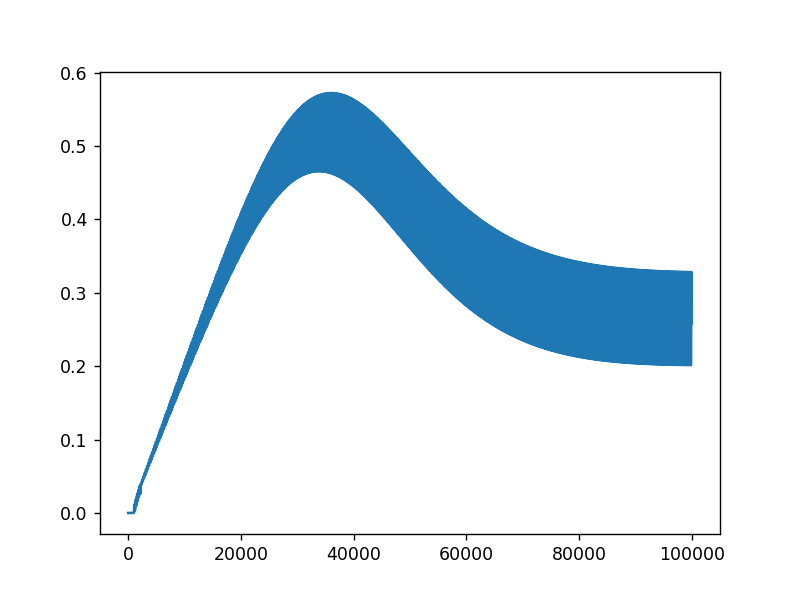

In [11]:
plt.figure()
plt.plot (10000*y)
# plt.plot (x)